In [1]:
pip install scanpy sympy leidenalg captum

Looking in indexes: http://pip.modelarts.private.com:8888/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pylab inline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import scanpy as sc
import pandas as pd
import torch
import scipy
import time
from STEM.model import *
from STEM.utils import *
import torch_npu
from torch_npu.contrib import transfer_to_npu

Populating the interactive namespace from numpy and matplotlib


/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/torch_npu/contrib/transfer_to_npu.py:94: ImportWarning: 
    *************************************************************************************************************
    The torch.Tensor.cuda and torch.nn.Module.cuda are replaced with torch.Tensor.npu and torch.nn.Module.npu now..
    The torch.cuda.DoubleTensor is replaced with torch.npu.FloatTensor cause the double type is not supported now..
    The backend in torch.distributed.init_process_group set to hccl now..
    The torch.cuda.* and torch.cuda.amp.* are replaced with torch.npu.* and torch.npu.amp.* now..
    The device parameters have been replaced with npu in the function below:
    torch.logspace, torch.randint, torch.hann_window, torch.rand, torch.full_like, torch.ones_like, torch.rand_like, torch.randperm, torch.arange, torch.frombuffer, torch.normal, torch._empty_per_channel_affine_quantized, torch.empty_strided, torch.empty_like, torch.scalar_tensor,

In [1]:
pip install anndata

Looking in indexes: http://pip.modelarts.private.com:8888/repository/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import anndata
scdata = anndata.read_h5ad('./data/fetal_brain/scRNA_merge_Annoed.h5ad')
#scdata = scdata.T
stdata = anndata.read_h5ad('./data/fetal_brain/BL_D5_lasso_cellbin.h5ad')
#stdata = stdata.T

/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return

In [3]:
scdata

AnnData object with n_obs × n_vars = 80480 × 49094
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'organ', 'batch', 'percent.MT', 'integrated_snn_res.1', 'seurat_clusters', 'AnnoCluster'
    var: 'features'

In [5]:
sc.pp.calculate_qc_metrics(scdata,percent_top=None, log1p=False, inplace=True)
scdata.obs['n_genes_by_counts'].median()

sc.pp.calculate_qc_metrics(stdata,percent_top=None, log1p=False, inplace=True)
stdata.obs['n_genes_by_counts'].median()

/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/pandas/compat/_optional.py:117: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(version) < minimum_version:
/home/ma-user/anaconda3/envs/MindSpore/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


357.0

In [17]:
scdata.obs

,orig.ident,nCount_RNA,nFeature_RNA,organ,batch,percent.MT,integrated_snn_res.1,seurat_clusters,AnnoCluster,n_genes_by_counts,total_counts
w11_1:CELL2755_N1,w11,1723.0,910,brain,w11_1/3,4.567437,4,4,EX_migrating_newborn,910,2057.489979
w11_1:CELL2197_N1,w11,2088.0,1206,brain,w11_1/3,2.535587,6,6,EX_unknown4_TAS2R14,1206,2487.006456
w11_1:CELL4499_N1,w11,967.0,586,brain,w11_1/3,2.314368,9,9,EX_UL4_KLHL14+SULF1+,586,1604.871810
w11_1:CELL1063_N1,w11,3638.0,1951,brain,w11_1/3,5.414980,0,0,EX_SP1,1951,3197.522278
w11_1:CELL4301_N1,w11,1002.0,589,brain,w11_1/3,1.064860,2,2,EX_UL1_PRSS12+TTC28+,589,1598.845241
...,...,...,...,...,...,...,...,...,...,...,...
w21_8:CELL4011_N1,w21,2290.0,1155,brain,w21_1/2,3.160920,17,17,OL,1155,2376.007477
w21_8:CELL3308_N1,w21,2259.0,1361,brain,w21_1/2,7.123180,12,12,AS,1361,2656.108457
w21_8:CELL3592_N1,w21,2273.0,1250,brain,w21_1/2,4.906732,12,12,AS,1250,2519.947498
w21_8:CELL5132_N1,w21,1851.0,1064,brain,w21_1/2,2.565418,17,17,OL,1064,2298.573028


In [24]:
unique(scdata.obs['batch'])

array(['w11_1/2', 'w11_1/3', 'w11_2/5', 'w15_1/2', 'w15_2/5', 'w21_1/2'],
      dtype=object)

In [346]:
# 定义条件：提取批次为 'batch_1' 的细胞
condition = scdata.obs['batch'] == 'w15_2/5'

# 使用布尔索引提取满足条件的细胞
adata = scdata[condition, :]

In [ ]:
spoor=np.array(stdata.obs[['x','y']])

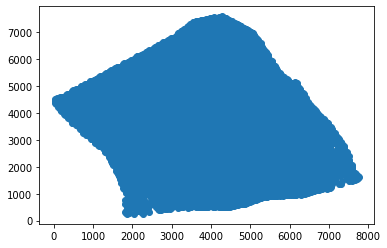

In [45]:
plt.scatter(spoor[:,0],spoor[:,1])

In [22]:
area=float(stdata.obs[['x']].max())*float(stdata.obs[['y']].max())
point_number=stdata.obs.shape[0]

In [99]:
import math
average_diameter=math.sqrt(area/point_number)
average_diameter

54.998252238073015

In [96]:
average_diameter=math.sqrt(np.mean(stdata.obs[['area']]))
average_diameter

37.143317732067906

In [419]:
import numpy as np

# 定义掩码的尺寸
mask_size = math.sqrt(50) * average_diameter

new_point_i=-1
new_mask=[]
new_spoor = []

# 遍历每个点的坐标
for point_i in range(spoor.shape[0]):
    x,y=spoor[point_i] # 获取点的坐标
    #print(x,y)
    
    # 计算所属的掩码的左下角坐标
    mask_i_x = x // mask_size+2
    mask_i_y = y // mask_size+1

    if [mask_i_x,mask_i_y] not in new_spoor:
        new_spoor+=[[mask_i_x,mask_i_y]]
        new_point_i+=1
    new_mask+= [new_point_i]


In [420]:
# 应用掩码到 st据中
new_expression=np.zeros([len(unique(new_mask)),stdata.X.shape[1]])
new_spoor_reorder=np.zeros([len(unique(new_mask)),2])
renew_point_i=-1
for new_point in unique(new_mask):
    renew_point_i+=1
    new_expression[renew_point_i]= np.sum(stdata.X[np.array(new_mask)==new_point],axis=0)##组成新点的旧点
    new_spoor_reorder[renew_point_i][0],new_spoor_reorder[renew_point_i][1]=new_spoor[new_point]
bin50_stdata=anndata.AnnData(X=new_expression, obsm={'spatial': new_spoor_reorder})

In [438]:
spcoor=bin50_stdata.obsm['spatial']
st_neighbor = scipy.spatial.distance.cdist(spcoor,spcoor)
sigma = 3
st_neighbor = np.exp(-st_neighbor**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

In [422]:
st_neighbor

array([[1.32980760e-01, 3.04173075e-03, 4.86311140e-04, ...,
        1.50541837e-06, 4.95573172e-07, 1.98744248e-06],
       [3.04173075e-03, 1.32980760e-01, 6.45850032e-02, ...,
        4.48758892e-03, 3.59338030e-03, 7.39878330e-03],
       [4.86311140e-04, 6.45850032e-02, 1.32980760e-01, ...,
        4.37763337e-02, 4.11653493e-04, 5.17156277e-02],
       ...,
       [1.50541837e-06, 4.48758892e-03, 4.37763337e-02, ...,
        1.32980760e-01, 3.57209558e-05, 1.25794409e-01],
       [4.95573172e-07, 3.59338030e-03, 4.11653493e-04, ...,
        3.57209558e-05, 1.32980760e-01, 1.28190225e-04],
       [1.98744248e-06, 7.39878330e-03, 5.17156277e-02, ...,
        1.25794409e-01, 1.28190225e-04, 1.32980760e-01]])

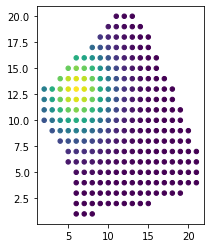

In [423]:
figsize(3,4)
plt.scatter(spcoor[:,0],spcoor[:,1],c=np.log1p(st_neighbor[14,:]),s=20)

In [424]:
# 获取两个 AnnData 对象的基因名称
genes1=scdata.var_names
genes2=stdata.var_names
intersection = list(set(genes1) & set(genes2))
a_index=[True if gene in intersection else False for gene in adata.var_names]

In [425]:
b_index=[True if gene in intersection else False for gene in stdata.var_names]

In [426]:
b_var=stdata.var_names[b_index]

In [427]:
b_var.shape

(25952,)

In [428]:
# 保留基因交集
a = adata[:, a_index]
b = bin50_stdata[:, b_index]

In [454]:
b.var_names=b_var

In [463]:
b.obs.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '248', '249', '250', '251', '252', '253', '254', '255', '256', '257'],
      dtype='object', length=258)

In [449]:
sc.pp.highly_variable_genes(a, n_top_genes=5000)

# 获取高变异基因的掩码
highly_variable_mask = a.var['highly_variable']
a_top=a[:,highly_variable_mask]

In [465]:
sc.pp.log1p(b)
sc.pp.highly_variable_genes(b, n_top_genes=5000)

# 获取高变异基因的掩码

highly_variable_mask = b.var['highly_variable']
b_top=b[:,highly_variable_mask]

In [471]:
genes1=a_top.var_names
genes2=b_top.var_names
intersection = list(set(genes1) & set(genes2))

In [472]:
a_index=[True if gene in intersection else False for gene in a_top.var_names]
a_top_int=a_top[:, a_index]
b_index=[True if gene in intersection else False for gene in b_top.var_names]
b_top_int=b_top[:, b_index]

In [497]:
sc.pp.log1p(b_top_int)
sc.pp.log1p(a_top_int)

In [498]:
sc.pp.calculate_qc_metrics(b_top_int,percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a_top_int,percent_top=None, log1p=False, inplace=True)
dp = 1-a_top_int.obs['n_genes_by_counts'].median()/b_top_int.obs['n_genes_by_counts'].median()
dp

-3.208333333333333

In [499]:
dp=0

In [500]:
sc_adata_df=pd.DataFrame(a_top_int.X.toarray(),index=a_top_int.obs_names,columns=a_top_int.var_names)
st_adata_df=pd.DataFrame(b_top_int.X,index=b_top_int.obs_names,columns=b_top_int.var_names)

In [501]:
sc_adata_df=sc_adata_df.reindex(columns=intersection)
st_adata_df=st_adata_df.reindex(columns=intersection)

In [502]:
st_adata_df.shape

(258, 1217)

In [503]:
class setting( object ):
    pass
seed_all(2022)
opt= setting()
setattr(opt, 'device', 'npu:0')
setattr(opt, 'outf', 'log/fetal_brain')
setattr(opt, 'n_genes', 1217)
setattr(opt, 'no_bn', False)
setattr(opt, 'lr', 0.002)
setattr(opt, 'sigma', 3)
setattr(opt, 'alpha', 0.8)
setattr(opt, 'verbose', True)
setattr(opt, 'mmdbatch', 1000)
setattr(opt, 'dp', 0)

In [504]:
%%time
testmodel = SOmodel(opt)
testmodel.togpu()
loss_curve = testmodel.train_wholedata(400,torch.tensor(sc_adata_df.values).float(),torch.tensor(st_adata_df.values).float(),torch.tensor(spcoor).float())

RuntimeError: Run:/usr1/workspace/FPTA_Daily_Plugin_open_date/CODE/torch_npu/csrc/framework/OpParamMaker.cpp:136 NPU error,NPU error code is:500002
E29999: Inner Error, Please contact support engineer!
E29999  [SubGraphOpt][Compile][ProcFailedCompTask] Thread[281463067525600] recompile single op[trans_TransData_54] failed[FUNC:ProcessAllFailedCompileTasks][FILE:tbe_op_store_adapter.cc][LINE:907]
        TraceBack (most recent call last):
        [SubGraphOpt][Compile][ParalCompOp] Thread[281463067525600] process fail task failed[FUNC:ParallelCompileOp][FILE:tbe_op_store_adapter.cc][LINE:947]
        [SubGraphOpt][Compile][CompOpOnly] CompileOp failed.[FUNC:CompileOpOnly][FILE:op_compiler.cc][LINE:994]
        [GraphOpt][FusedGraph][RunCompile] Failed to compile graph with compiler Normal mode Op Compiler[FUNC:SubGraphCompile][FILE:fe_graph_optimizer.cc][LINE:1349]
        Call OptimizeFusedGraph failed, ret:-1, engine_name:AIcoreEngine, graph_name:partition0_rank1_new_sub_graph1[FUNC:OptimizeSubGraph][FILE:graph_optimize.cc][LINE:130]
        subgraph 0 optimize failed[FUNC:OptimizeSubGraphWithMultiThreads][FILE:graph_manager.cc][LINE:716]
        build graph failed, graph id:84, ret:-1[FUNC:BuildModel][FILE:ge_generator.cc][LINE:1484]
        [Build][SingleOpModel]call ge interface generator.BuildSingleOpModel failed. ge result = 4294967295[FUNC:ReportCallError][FILE:log_inner.cpp][LINE:161]
        [Build][Op]Fail to build op model[FUNC:ReportInnerError][FILE:log_inner.cpp][LINE:145]
        build op model failed, result = 500002[FUNC:ReportInnerError][FILE:log_inner.cpp][LINE:145]
        [SubGraphOpt][Compile][ProcFailedCompTask] Thread[281463067525600] recompile single op[trans_TransData_55] failed[FUNC:ProcessAllFailedCompileTasks][FILE:tbe_op_store_adapter.cc][LINE:907]
        build graph failed, graph id:85, ret:-1[FUNC:BuildModel][FILE:ge_generator.cc][LINE:1484]
        [SubGraphOpt][Compile][ProcFailedCompTask] Thread[281462913479136] recompile single op[trans_TransData_56] failed[FUNC:ProcessAllFailedCompileTasks][FILE:tbe_op_store_adapter.cc][LINE:907]
        [SubGraphOpt][Compile][ParalCompOp] Thread[281462913479136] process fail task failed[FUNC:ParallelCompileOp][FILE:tbe_op_store_adapter.cc][LINE:947]
        build graph failed, graph id:86, ret:-1[FUNC:BuildModel][FILE:ge_generator.cc][LINE:1484]


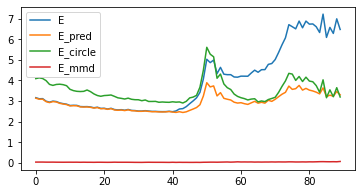

In [7]:
figsize(6,3)
skip=10
N = len(loss_curve['E'])-skip
plt.plot(np.arange(N),loss_curve['E'][skip:],label='E')
plt.plot(np.arange(N),loss_curve['E_pred'][skip:],label='E_pred')
plt.plot(np.arange(N),loss_curve['E_circle'][skip:],label='E_circle')
plt.plot(np.arange(N),loss_curve['E_mmd'][skip:],label='E_mmd')
plt.legend()

In [11]:
testmodel.modeleval()
scembedding = testmodel.netE(torch.tensor(scdata.values,dtype=torch.float32).cuda())
stembedding = testmodel.netE(torch.tensor(stdata.values,dtype=torch.float32).cuda())
netst2sc = F.softmax(stembedding.mm(scembedding.t()),dim=1).detach().cpu().numpy()
netsc2st = F.softmax(scembedding.mm(stembedding.t()),dim=1).detach().cpu().numpy()

In [12]:
np.save('result/230215_testdp_pure_mmd-E1z2.npy',netst2sc)
np.save('result/230215_testdp_pure_sc2st_mmd-E1z2.npy',netsc2st)
np.save('result/230215_scembbedding-E1z2.npy',scembedding.detach().cpu().numpy())
np.save('result/230215_stembbedding-E1z2.npy',stembedding.detach().cpu().numpy())

In [13]:
testmodel.save()